In [ ]:
import pandas as pd

: 

### Analysis

In [32]:
data = pd.read_csv('twitter_data/tweets_processed.csv')
green = pd.read_csv('twitter_data/green_tweets_processed.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,5,9,10,11,15,19,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306144 entries, 0 to 306143
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   possibly_sensitive         306144 non-null  object 
 1   tweets_original            306143 non-null  object 
 2   source                     305671 non-null  object 
 3   lang                       306134 non-null  object 
 4   created_at                 306131 non-null  object 
 5   id                         306131 non-null  object 
 6   author                     306131 non-null  object 
 7   Branche                    306131 non-null  object 
 8   Branche-6                  306131 non-null  object 
 9   Sektor                     306131 non-null  object 
 10  B2B                        306131 non-null  object 
 11  B2C                        306131 non-null  object 
 12  likes                      306131 non-null  float64
 13  retweets                   30

Uncomment the following for getting a random sample of the data (e.g. for creating a test set or looking at a random sample)

In [23]:
'''
green_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original
num_tweets = 1000 #change to your needs 

dateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")
data['green_weight'] = data['green'].apply(lambda x: green_push_factor if x else 1) 
data.sample(num_tweets, weights=data.green_weight).to_csv('sample_'+str(num_tweets)+"_"+dateTimeObj+'.csv', header=True, index=False, columns=list(data.axes[1]))
'''

'\ngreen_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original\nnum_tweets = 1000 #change to your needs \n\ndateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")\ndata[\'green_weight\'] = data[\'green\'].apply(lambda x: green_push_factor if x else 1) \ndata.sample(num_tweets, weights=data.green_weight).to_csv(\'sample_\'+str(num_tweets)+"_"+dateTimeObj+\'.csv\', header=True, index=False, columns=list(data.axes[1]))\n'

### Analyse grouped data

#### Boxplot

Set the desired metric, category grouping (groupby) and dataset as proposed in the comments

Text(0, 0.5, 'likes')

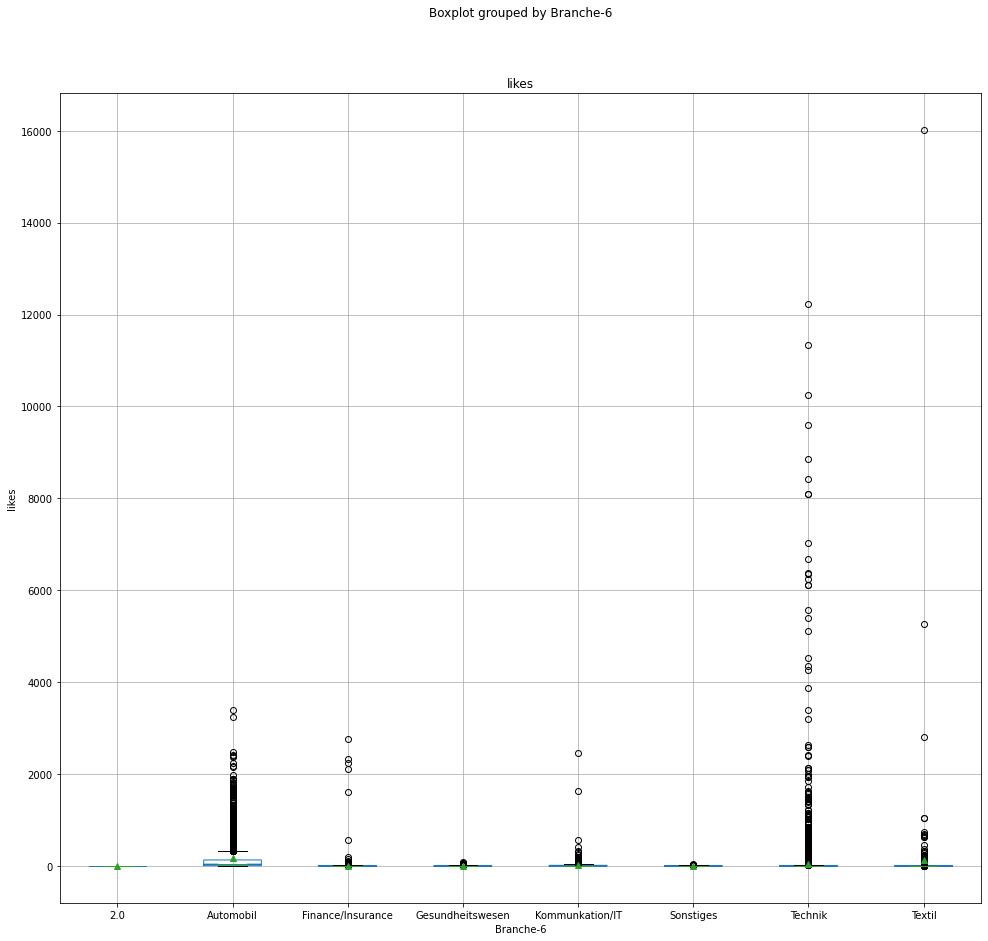

In [33]:
metric = "likes" #options: use "likes", "more_information_provided", "retweets", "quotes", "replies" or "year"
groupby = "Branche-6" #options: use "Branche-6", "green", "author", "B2C" or "year" (when using "author", set the rot variable in boxplot to 90)
#alternatively to use the green dataset instead of the whole on (replace data with green)
boxplot = green.boxplot([metric], by = [groupby],
                     figsize = (16, 15),
                     showmeans = True,
                     notch = True, 
                     rot=0 # set to 90 in case of more than 10 categories (e.g. author)
                     )
boxplot.set_xlabel(groupby)
boxplot.set_ylabel(metric)

In [25]:
#green_eng = green[green['lang'] =='en']
#green_eng['Tweets'].to_csv('green_eng_tweets_100123.csv', header=True, index=False)

#### Line/Bar Chart
Set the following variables to your needs and run the next three cells

In [26]:
groupby = 'year' #options: use "Branche-6", "green", "author", "B2C" or "year"
column = 'Tweets'
factor = 10
line_chart = True # set false for bar chart
figsize = (18,8)

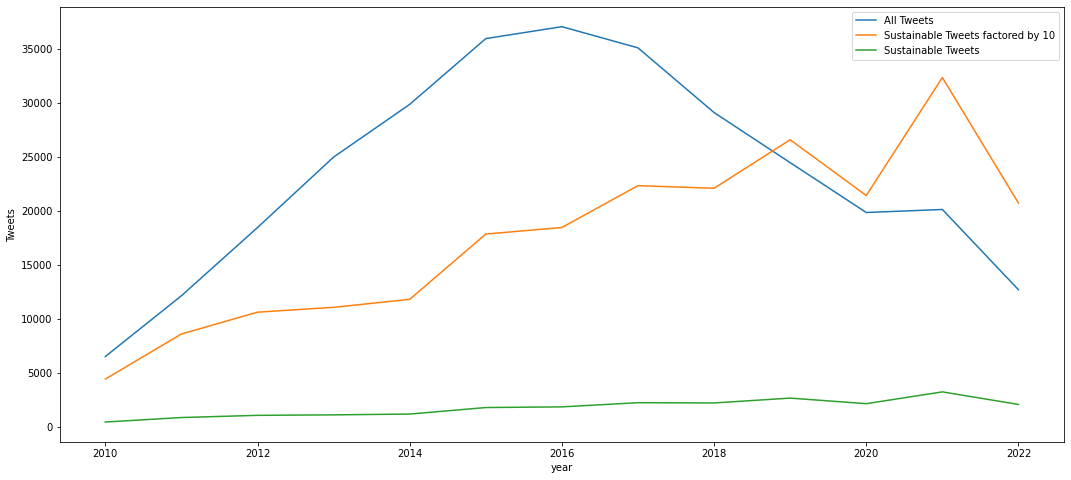

In [27]:
if line_chart:
    ax = data.groupby([groupby]).count()[column].plot(label='All '+column)
    green.groupby([groupby]).count()[column].multiply(10).plot(ax=ax, label='Sustainable '+column+' factored by 10')
    green.groupby([groupby]).count()[column].plot(figsize=figsize,ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
else:
    #ax = data.groupby([groupby]).count()[column].plot.bar(label='All '+column)
    #green.groupby([groupby]).count()[column].multiply(10).plot.bar(ax=ax, label='Sustainable '+column+' factored by 10')
    #green.groupby([groupby]).count()[column].plot.bar(figsize=(12,5),ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
    df = pd.concat([data[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby),
    green[[groupby, column]].groupby([groupby]).count().multiply(factor).reset_index().set_index(groupby).rename(columns={column: column+'_green_factor_'+str(factor)}), 
    green[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby).rename(columns={column: column+'_green'})], axis=1)
    ax = df.plot.bar(figsize = figsize)
ax.set_xlabel(groupby)
ax.set_ylabel(column)
ax.legend()

<AxesSubplot:xlabel='year'>

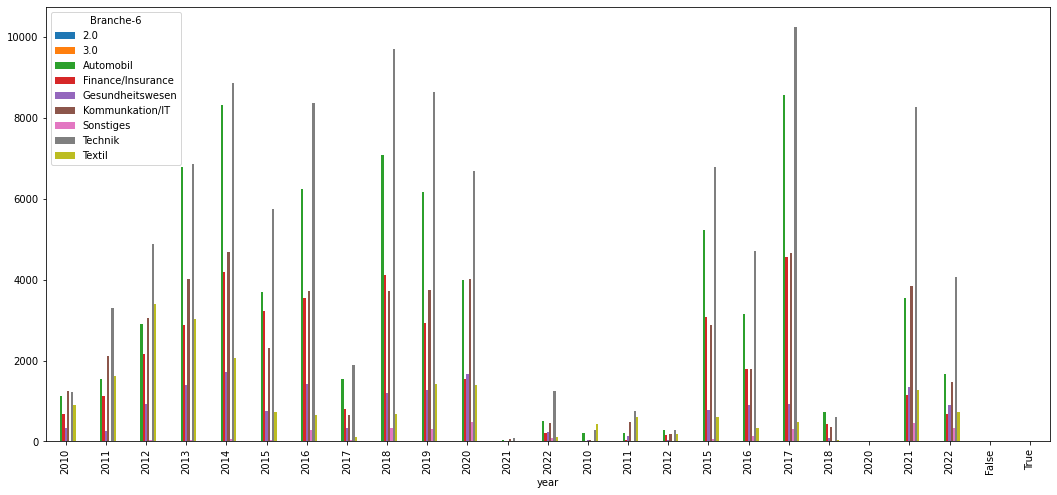

In [34]:
first_grouping = "year"
second_grouping = "Branche-6"
data.groupby([first_grouping, second_grouping]).count()['Tweets'].unstack().plot.bar(figsize = figsize)

#### Table Data
Set the groupby variable and run

In [35]:
groupby = "Branche-6" # options "autor", "Branche-6", "B2C", "year"

In [36]:
num_greens = green.groupby([groupby]) \
        .agg({'Tweets':'count', 'likes':'mean', 'retweets':'mean', 'replies':'mean','quotes':'mean'}) \
        .rename(columns={'Tweets':'_num_Tweets','likes':'mean_likes','replies':'mean_replies', 'quotes':'mean_quotes', 'retweets':'mean_retweets'}) \
        .reset_index().set_index(groupby)
num_tweets = data.groupby([groupby]) \
        .agg({'Tweets':'count', 'likes':'mean', 'retweets':'mean', 'replies':'mean','quotes':'mean'}) \
       .rename(columns={'Tweets':'_num_Tweets','likes':'mean_likes','replies':'mean_replies', 'quotes':'mean_quotes', 'retweets':'mean_retweets'}) \
        .reset_index() \
        .set_index(groupby)
comparison = num_tweets.join(num_greens, lsuffix="_all", rsuffix="_green", sort=True)
comparison['_percentage_green'] = round(comparison['_num_Tweets_green']*100.0/comparison['_num_Tweets_all'],1)
comparison.sort_values(by=['_percentage_green']).reindex(sorted(comparison.columns), axis=1)

TypeError: Could not convert [] to numeric